In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_link = 'C:/Users/HP/Downloads/Phonepe Case Study/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx'

# 1. Data Loading and Understanding

### 1.1 Load each dataset and display its structure

In [3]:
st_txn_df=pd.read_excel(file_link,sheet_name = 'State_Txn and Users')
st_txn_split_df=pd.read_excel(file_link,sheet_name = 'State_TxnSplit')
st_dev_df=pd.read_excel(file_link,sheet_name = 'State_DeviceData')
dis_txn_user_df=pd.read_excel(file_link,sheet_name = 'District_Txn and Users')
dis_demo_df=pd.read_excel(file_link,sheet_name = 'District Demographics')

In [5]:
print(st_txn_df.head())

                       State  Year  Quarter  Transactions  Amount (INR)  \
0  Andaman & Nicobar Islands  2018        1          6658  1.463176e+07   
1  Andaman & Nicobar Islands  2018        2         11340  2.833854e+07   
2  Andaman & Nicobar Islands  2018        3         16265  5.555747e+07   
3  Andaman & Nicobar Islands  2018        4         23758  9.054834e+07   
4  Andaman & Nicobar Islands  2019        1         30486  1.022997e+08   

     ATV (INR)  Registered Users  App Opens  
0  2197.621091              6740          0  
1  2498.989022              9405          0  
2  3415.768284             12149          0  
3  3811.277720             15222          0  
4  3355.630147             18596          0  


In [6]:
print(st_txn_split_df.tail(10))

            State  Year  Quarter          Transaction Type  Transactions  \
2504  West Bengal  2021        1     Peer-to-peer payments      53869075   
2505  West Bengal  2021        1         Merchant payments      37143701   
2506  West Bengal  2021        1  Recharge & bill payments      26673733   
2507  West Bengal  2021        1        Financial Services        166727   
2508  West Bengal  2021        1                    Others        400816   
2509  West Bengal  2021        2     Peer-to-peer payments      64661051   
2510  West Bengal  2021        2         Merchant payments      41696787   
2511  West Bengal  2021        2  Recharge & bill payments      34799709   
2512  West Bengal  2021        2        Financial Services        190537   
2513  West Bengal  2021        2                    Others        549353   

      Amount (INR)    ATV (INR)  
2504  2.022402e+11  3754.292226  
2505  2.891834e+10   778.553104  
2506  1.133967e+10   425.124820  
2507  1.754458e+08  1052.29

In [12]:
total_rows = len(st_dev_df)
start_index = (total_rows - 10) // 2
end_index = start_index + 10

# Display 10 rows from the middle of the dataset
middle_rows = st_dev_df.iloc[start_index:end_index]
print(middle_rows)

            State  Year  Quarter     Brand  Registered Users  Percentage
2767       Ladakh  2021        2   OnePlus              1741    0.023198
2768       Ladakh  2021        2  Motorola               922    0.012285
2769       Ladakh  2021        2    Huawei               894    0.011912
2770       Ladakh  2021        2    Lenovo               490    0.006529
2771       Ladakh  2021        2    Others              2610    0.034778
2772  Lakshadweep  2018        1   Samsung               102    0.203593
2773  Lakshadweep  2018        1    Xiaomi               100    0.199601
2774  Lakshadweep  2018        1      Vivo                67    0.133733
2775  Lakshadweep  2018        1      Oppo                56    0.111776
2776  Lakshadweep  2018        1    Huawei                25    0.049900


In [18]:
# Select the first 10 rows
df_first_10 = dis_txn_user_df.head(10)

# Select the last 10 rows
df_last_10 = dis_txn_user_df.tail(10)

# Concatenate the two DataFrames
df = pd.concat([df_first_10, df_last_10])

print(df)

                           State  Year  Quarter                    District  \
0      Andaman & Nicobar Islands  2018        1                    Nicobars   
1      Andaman & Nicobar Islands  2018        1    North And Middle Andaman   
2      Andaman & Nicobar Islands  2018        1               South Andaman   
3      Andaman & Nicobar Islands  2018        2                    Nicobars   
4      Andaman & Nicobar Islands  2018        2    North And Middle Andaman   
5      Andaman & Nicobar Islands  2018        2               South Andaman   
6      Andaman & Nicobar Islands  2018        3                    Nicobars   
7      Andaman & Nicobar Islands  2018        3    North And Middle Andaman   
8      Andaman & Nicobar Islands  2018        3               South Andaman   
9      Andaman & Nicobar Islands  2018        4                    Nicobars   
10238                West Bengal  2021        2                 Murshidabad   
10239                West Bengal  2021        2     

In [15]:
print(dis_demo_df[::10])

                 State       District   Headquarters  Population  \
0       Andhra Pradesh      Anantapur      Anantapur     4083315   
10      Andhra Pradesh  Visakhapatnam  Visakhapatnam     4288113   
20   Arunachal Pradesh      Lepa Rada          Basar           0   
30   Arunachal Pradesh          Siang         Pangin       31920   
40               Assam        Barpeta        Barpeta     1693622   
..                 ...            ...            ...         ...   
700         Chandigarh     Chandigarh     Chandigarh     1055450   
710    Jammu & Kashmir          Jammu          Jammu     1526406   
720    Jammu & Kashmir          Samba          Samba      318611   
730              Delhi    North Delhi   Sadar Bazaar      887978   
740         Puducherry     Puducherry    Pondicherry      950289   

     Area (sq km)  Density  Code Alternate Name  
0         19130.0      213  AP01      Anantapur  
10        11161.0      384  AP10  Visakhapatnam  
20            0.0        0  AR08 

### 1.2 Display basic statistics and data types for each dataset

In [26]:
state_txn_users_stats = st_txn_df.describe()
state_txn_split_stats = st_txn_split_df.describe()
state_device_data_stats = st_dev_df.describe()
district_txn_users_stats = dis_txn_user_df.describe()
district_demographics_stats = dis_demo_df.describe()

state_txn_users_dtypes = st_txn_df.dtypes
state_txn_split_dtypes = st_txn_split_df.dtypes
state_device_data_dtypes = st_dev_df.dtypes
district_txn_users_dtypes = dis_txn_user_df.dtypes
district_demographics_dtypes = dis_demo_df.dtypes


In [27]:
print(state_txn_users_stats)
print(state_txn_split_stats)
print(state_device_data_stats)
print(district_txn_users_stats)
print(district_demographics_stats)

              Year     Quarter  Transactions  Amount (INR)    ATV (INR)  \
count   504.000000  504.000000  5.040000e+02  5.030000e+02   504.000000   
mean   2019.285714    2.357143  4.074000e+07  7.083332e+10  1993.471543   
std       1.031181    1.109971  8.228714e+07  1.440902e+11   607.464894   
min    2018.000000    1.000000  7.780000e+02  1.928611e+06     0.000000   
25%    2018.000000    1.000000  5.925578e+05  1.167157e+09  1598.910667   
50%    2019.000000    2.000000  6.217487e+06  1.051605e+10  1861.380589   
75%    2020.000000    3.000000  4.363675e+07  6.947045e+10  2259.087924   
max    2021.000000    4.000000  5.736165e+08  1.027958e+12  3938.733850   

       Registered Users     App Opens  
count      5.040000e+02  5.040000e+02  
mean       4.777501e+06  9.774471e+07  
std        6.644496e+06  2.042376e+08  
min        5.010000e+02  0.000000e+00  
25%        1.574202e+05  0.000000e+00  
50%        1.747914e+06  2.930574e+06  
75%        7.320945e+06  8.615022e+07  
max 

In [33]:
print(state_txn_users_dtypes)
print(state_txn_split_dtypes)
print(state_device_data_dtypes)
print(district_txn_users_dtypes)
print(district_demographics_dtypes)

State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object
State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object
State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object
State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object
State              object
District           object
Headquarters       objec

### 1.3: Check for missing values

In [32]:
def missing_values_info(df):
    missing_counts = df.isnull().sum()
    missing_percentage = (missing_counts / len(df)) * 100
    missing_info = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percentage})
    missing_info = missing_info[missing_info['Missing Values'] > 0]
    highest_missing_col = missing_info['Percentage'].idxmax() if not missing_info.empty else None
    highest_missing_percentage = missing_info.loc[highest_missing_col, 'Percentage'] if highest_missing_col else 0
    return missing_info, highest_missing_col, highest_missing_percentage

state_txn_users_missing_info, state_txn_users_highest_col, state_txn_users_highest_pct = missing_values_info(st_txn_df)
state_txnsplit_missing_info, state_txnsplit_highest_col, state_txnsplit_highest_pct = missing_values_info(st_txn_split_df)
state_device_data_missing_info, state_device_data_highest_col, state_device_data_highest_pct = missing_values_info(st_dev_df)
district_txn_users_missing_info, district_txn_users_highest_col, district_txn_users_highest_pct = missing_values_info(dis_txn_user_df)
district_demographics_missing_info, district_demographics_highest_col, district_demographics_highest_pct = missing_values_info(dis_demo_df)

print("State_Txn and Users Missing Info:")
print(state_txn_users_missing_info)
print(f"Highest Missing Column: {state_txn_users_highest_col}, Highest Missing Percentage: {state_txn_users_highest_pct}\n")

print("State_TxnSplit Missing Info:")
print(state_txnsplit_missing_info)
print(f"Highest Missing Column: {state_txnsplit_highest_col}, Highest Missing Percentage: {state_txnsplit_highest_pct}\n")

print("State_DeviceData Missing Info:")
print(state_device_data_missing_info)
print(f"Highest Missing Column: {state_device_data_highest_col}, Highest Missing Percentage: {state_device_data_highest_pct}\n")

print("District_Txn and Users Missing Info:")
print(district_txn_users_missing_info)
print(f"Highest Missing Column: {district_txn_users_highest_col}, Highest Missing Percentage: {district_txn_users_highest_pct}\n")

print("District Demographics Missing Info:")
print(district_demographics_missing_info)
print(f"Highest Missing Column: {district_demographics_highest_col}, Highest Missing Percentage: {district_demographics_highest_pct}\n")




State_Txn and Users Missing Info:
              Missing Values  Percentage
Amount (INR)               1    0.198413
Highest Missing Column: Amount (INR), Highest Missing Percentage: 0.1984126984126984

State_TxnSplit Missing Info:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
Highest Missing Column: None, Highest Missing Percentage: 0

State_DeviceData Missing Info:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
Highest Missing Column: None, Highest Missing Percentage: 0

District_Txn and Users Missing Info:
           Missing Values  Percentage
Code                   28    0.273224
ATV (INR)               4    0.039032
Highest Missing Column: Code, Highest Missing Percentage: 0.273224043715847

District Demographics Missing Info:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
Highest Missing Column: None, Highest Missing Percentage: 0



### 1.4: Create a summary

In [42]:
total_states = len(dis_demo_df['State'].unique())
total_districts = len(dis_demo_df['District'].unique())
state_with_max_districts=dis_demo_df['State'].value_counts().idxmax()
highest_no_districts = dis_demo_df['State'].value_counts().max()

print(f"Total number of states: {total_states}")
print(f"Total number of districts: {total_districts}")
print(f"State with the highest number of districts: {state_with_max_districts}")
print(f"Number of districts in {state_with_max_districts}: {highest_no_districts}")

Total number of states: 36
Total number of districts: 736
State with the highest number of districts: Uttar Pradesh
Number of districts in Uttar Pradesh: 75


# 2. Exploratory Data Analysis (EDA)

### 2.1: Analyze transaction trends over the years for each state

In [56]:
#grouping the data wrt. states and summing up total transactions & total amount
state_transaction_summary = st_txn_df.groupby('State').agg(
    total_transactions=('Transactions', 'sum'),
    total_transaction_amount=('Amount (INR)', 'sum')
).reset_index()
print(state_transaction_summary)

                                   State  total_transactions  \
0              Andaman & Nicobar Islands             1223565   
1                         Andhra Pradesh          1781091169   
2                      Arunachal Pradesh             8043799   
3                                  Assam           123577981   
4                                  Bihar           713643889   
5                             Chandigarh            25516542   
6                           Chhattisgarh           241908549   
7   Dadra & Nagar Haveli and Daman & Diu            12462185   
8                                  Delhi          1011031124   
9                                    Goa            24481604   
10                               Gujarat           612992823   
11                               Haryana           567751410   
12                      Himachal Pradesh            52987445   
13                       Jammu & Kashmir            45053328   
14                             Jharkhand

In [57]:
# Identifying the top 5 states with the highest transaction volumes
top_5_states_highest = state_transaction_summary.nlargest(5, 'total_transactions')

# Identifying the top 5 states with the lowest transaction volumes
top_5_states_lowest = state_transaction_summary.nsmallest(5, 'total_transactions')

# Display the results
print("\nTop 5 States with the Highest Transaction Volumes:")
print(top_5_states_highest)

print("\nTop 5 States with the Lowest Transaction Volumes:")
print(top_5_states_lowest)


Top 5 States with the Highest Transaction Volumes:
             State  total_transactions  total_transaction_amount
15       Karnataka          2981044533              4.361396e+12
20     Maharashtra          2833670154              4.290995e+12
31       Telangana          2347430243              4.574246e+12
1   Andhra Pradesh          1781091169              3.187847e+12
28       Rajasthan          1382918930              2.625584e+12

Top 5 States with the Lowest Transaction Volumes:
                        State  total_transactions  total_transaction_amount
18                Lakshadweep               71610              1.921587e+08
0   Andaman & Nicobar Islands             1223565              3.641818e+09
17                     Ladakh             1880109              6.606978e+09
23                    Mizoram             2162776              6.317141e+09
22                  Meghalaya             5648913              1.254162e+10


### 2.2: Identify the most common transaction types in each state and quarter

In [31]:
# Group by State, Quarter, and Transaction Type, summing the Transactions
transaction_counts = st_txn_split_df.groupby(['State', 'Quarter', 'Transaction Type'])['Transactions'].sum().reset_index()

# For each State and Quarter, get the transaction type with the highest number of transactions
most_common_transaction_type = transaction_counts.loc[transaction_counts.groupby(['State', 'Quarter'])['Transactions'].idxmax()]

# Display the results
print(most_common_transaction_type)
most_common_transaction_type.to_csv("most_common_transaction_type.csv")

                         State  Quarter          Transaction Type  \
3    Andaman & Nicobar Islands        1     Peer-to-peer payments   
9    Andaman & Nicobar Islands        2  Recharge & bill payments   
14   Andaman & Nicobar Islands        3  Recharge & bill payments   
18   Andaman & Nicobar Islands        4     Peer-to-peer payments   
23              Andhra Pradesh        1     Peer-to-peer payments   
..                         ...      ...                       ...   
698                Uttarakhand        4     Peer-to-peer payments   
703                West Bengal        1     Peer-to-peer payments   
708                West Bengal        2     Peer-to-peer payments   
713                West Bengal        3     Peer-to-peer payments   
718                West Bengal        4     Peer-to-peer payments   

     Transactions  
3          138772  
9          180447  
14          84165  
18         110018  
23      255236515  
..            ...  
698      11515030  
703     114

### 2.3: Determine the device brand with the highest number of registered users in each state

In [73]:
device_counts = st_dev_df.groupby(['State','Brand'])['Registered Users'].sum().reset_index()
highest_device_brand = device_counts.loc[device_counts.groupby('State')['Registered Users'].idxmax()].reset_index()
print(highest_device_brand)

    index                                 State    Brand  Registered Users
0      11             Andaman & Nicobar Islands   Xiaomi             97889
1      22                        Andhra Pradesh   Xiaomi          40061549
2      34                     Arunachal Pradesh   Xiaomi            437803
3      46                                 Assam   Xiaomi           6979357
4      60                                 Bihar   Xiaomi          33721314
5      73                            Chandigarh   Xiaomi            896628
6      85                          Chhattisgarh   Xiaomi           8763373
7      98  Dadra & Nagar Haveli and Daman & Diu   Xiaomi            638834
8     109                                 Delhi   Xiaomi          24114984
9     120                                   Goa   Xiaomi           1208672
10    131                               Gujarat   Xiaomi          28942157
11    143                               Haryana   Xiaomi          21102142
12    156                

### 2.4 Create a list of the top district per state based on population

#### 2.4.1 For each state, identify the district with the highest population. Display the results in a tabular format

In [33]:
# Group by State and District, summing the Population
district_count = dis_demo_df.groupby(['State', 'District'])['Population'].sum().reset_index()

# For each State, get the district with the highest population
highest_district = district_count.loc[district_count.groupby('State')['Population'].idxmax()]

highest_district['State_District'] = highest_district['State'] + '_' + highest_district['District']

# Display the results
print(highest_district)


                                    State                District  Population  \
2               Andaman & Nicobar Islands           South Andaman      238142   
5                          Andhra Pradesh           East Godavari     5151549   
31                      Arunachal Pradesh              Papum Pare      176385   
67                                  Assam                  Nagaon     2826006   
100                                 Bihar                   Patna     5772804   
113                            Chandigarh              Chandigarh     1055450   
137                          Chhattisgarh                  Raipur     2160876   
142  Dadra & Nagar Haveli and Daman & Diu  Dadra and Nagar Haveli      343709   
150                                 Delhi        North West Delhi     3656539   
156                                   Goa               North Goa      817761   
158                               Gujarat               Ahmedabad     7208200   
194                         

#### 2.4.2 Create a column chart depicting the district with the highest population for each state.

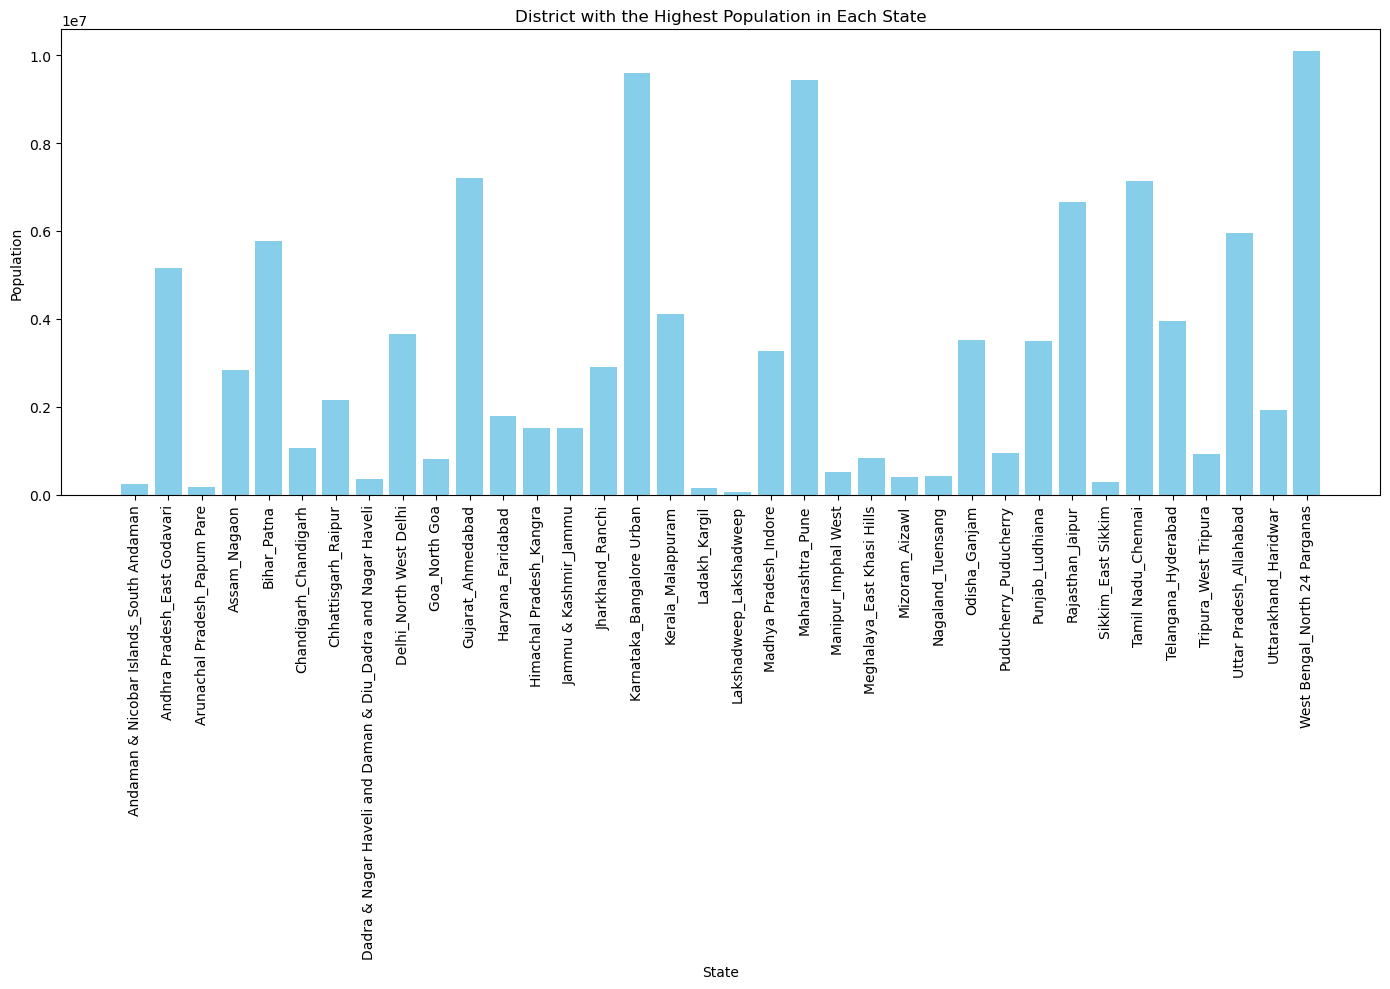

In [38]:
plt.figure(figsize=(14, 10))
plt.bar(highest_district['State_District'], highest_district['Population'], color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Population')
plt.title('District with the Highest Population in Each State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

### 2.5: Calculate the average transaction value (ATV) for each state

#### 2.5.1 : Compute the average transaction value for each state. Display the results in a tabular format.

In [89]:
# Sum ATV by state
total_ATV = st_txn_df.groupby('State')['ATV (INR)'].sum().reset_index()
#rounding it off to 2 decimal places
total_ATV['ATV (INR)'] = total_ATV['ATV (INR)'].round(2)
#sorting the data wrt. ATV
print(total_ATV)

                                   State  ATV (INR)
0              Andaman & Nicobar Islands   44229.73
1                         Andhra Pradesh   24473.28
2                      Arunachal Pradesh   36936.54
3                                  Assam   28118.94
4                                  Bihar   28326.44
5                             Chandigarh   29593.16
6                           Chhattisgarh   23111.46
7   Dadra & Nagar Haveli and Daman & Diu   20823.54
8                                  Delhi   22257.75
9                                    Goa   26533.62
10                               Gujarat   23745.42
11                               Haryana   25645.76
12                      Himachal Pradesh   25554.74
13                       Jammu & Kashmir   35119.08
14                             Jharkhand   22852.80
15                             Karnataka   21243.49
16                                Kerala   23400.20
17                                Ladakh   47715.12
18          

#### 2.5.2: Identify the top 5 states with the highest ATV and the top 5 states with the lowest ATV. Display the results.

In [91]:
#sorting the data wrt. sum of ATV by states, in a descending order.
total_ATV = total_ATV.sort_values(by='ATV (INR)', ascending=False).reset_index(drop=True)
#displaying the 5 top states having high ATV

print(f"Top 5 states:{total_ATV.head()}")
#displaying the 5 top states having high ATV

print(f"Bottom 5 states:{total_ATV.tail()}")

Top 5 states:                       State  ATV (INR)
0                     Ladakh   47715.12
1  Andaman & Nicobar Islands   44229.73
2                    Mizoram   40985.25
3                Lakshadweep   38865.66
4          Arunachal Pradesh   36936.54
Bottom 5 states:                                   State  ATV (INR)
31                             Karnataka   21243.49
32                           Maharashtra   21229.07
33  Dadra & Nagar Haveli and Daman & Diu   20823.54
34                                Odisha   19993.92
35                           West Bengal   19230.41


### 2.6: Analyze app usage trends

#### 2.6.1 : Calculate the total number of app opens over the years and quarters for each state. Display the results in a tabular format.

In [92]:
app_opening = st_txn_df.groupby(['Year','Quarter'])['App Opens'].sum().reset_index()
print(app_opening)

    Year  Quarter   App Opens
0   2018        1           0
1   2018        2           0
2   2018        3           0
3   2018        4           0
4   2019        1           0
5   2019        2   920409531
6   2019        3  3448355858
7   2019        4  4301061532
8   2020        1  4768934587
9   2020        2  4357622260
10  2020        3  5739306412
11  2020        4  7461591732
12  2021        1  8635472151
13  2021        2  9630577372


#### 2.6.2 : Identify trends in app usage by creating a line plot showing the number of app opens over time for a selected state.

Enter the state name:  Andhra Pradesh


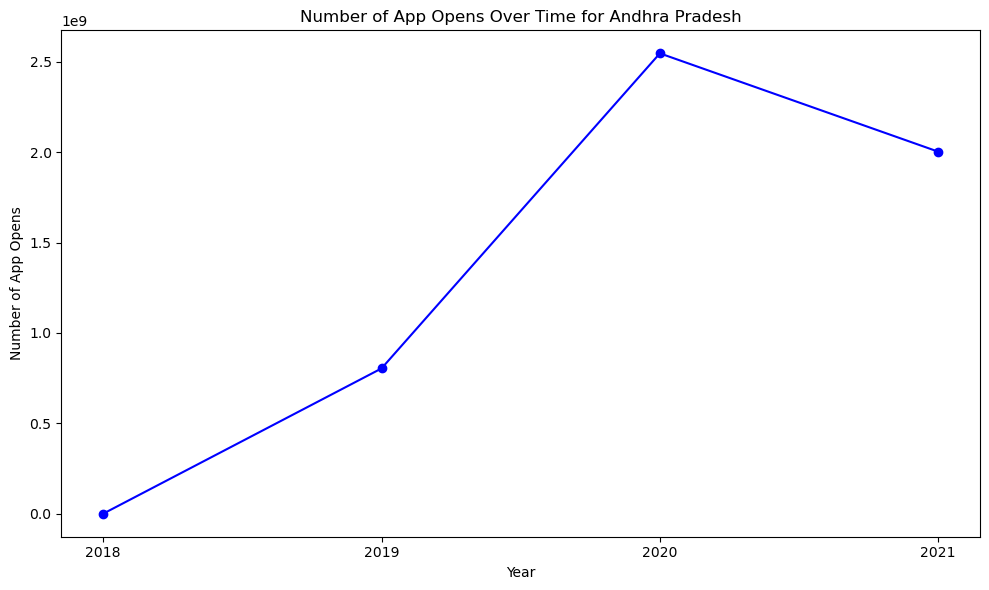

In [102]:
def line_plot_app_open(state):
    # Filter the data for the selected state
    state_data = st_txn_df[st_txn_df['State'] == state]
    
    # Group by 'Year' and calculate the sum of 'App Opens'
    app_opens_over_time = state_data.groupby(['Year'])['App Opens'].sum().reset_index()
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(app_opens_over_time['Year'], app_opens_over_time['App Opens'], marker='o', color='b')
    plt.xlabel('Year')
    plt.ylabel('Number of App Opens')
    plt.title(f'Number of App Opens Over Time for {state}')
    
    # Format x-axis to show only integer year values
    plt.xticks(app_opens_over_time['Year'])
    plt.tight_layout()
    plt.show()

# Example usage
state_name = input("Enter the state name: ")
line_plot_app_open(state_name)

### 2.7: Distribution of transaction types
Create a bar chart showing the distribution of different transaction types for each state for the most recent quarter in the dataset.

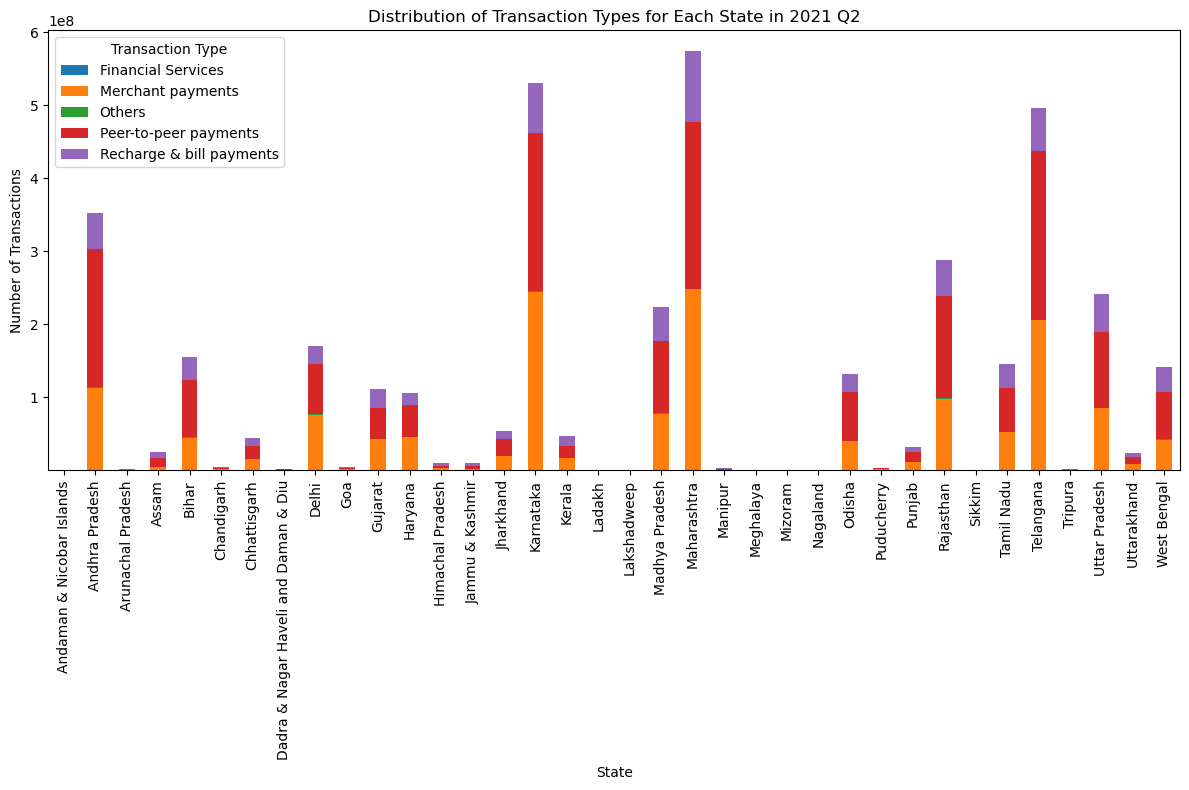

In [110]:
def transaction_type_distribution_most_recent_year_quarter(data):
    # Identify the most recent year and quarter
    most_recent_year = data['Year'].max()
    most_recent_quarter = data[data['Year'] == most_recent_year]['Quarter'].max()
    
    # Filter data for the most recent year and quarter
    recent_data = data[(data['Year'] == most_recent_year) & (data['Quarter'] == most_recent_quarter)]
    
    # Group by State and Transaction Type, summing up Transactions
    transaction_distribution = recent_data.groupby(['State', 'Transaction Type'])['Transactions'].sum().unstack().fillna(0)
    
    # Plotting
    transaction_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.xlabel('State')
    plt.ylabel('Number of Transactions')
    plt.title(f'Distribution of Transaction Types for Each State in {most_recent_year} Q{most_recent_quarter}')
    plt.legend(title='Transaction Type')
    plt.tight_layout()
    plt.show()

# Example usage
transaction_type_distribution_most_recent_year_quarter(st_txn_split_df)

### 2.8: Find unique mapping between district name and district code

In [4]:
unique_district_mappings = dis_demo_df[['District', 'Code']].drop_duplicates()

# Export the unique mappings to a CSV file
unique_district_mappings.to_csv('unique_district_mappings.csv', index=False)

print("CSV file 'unique_district_mappings.csv' has been created successfully.")

CSV file 'unique_district_mappings.csv' has been created successfully.


# 3. Data Quality Checks

### 3.1: Ensure data consistency across state and district levels

#### 3.1.1 For each state, calculate the total number of transactions, total transaction amount, and total registered users by summing up the values from the district level data.

In [5]:
district_summary = dis_txn_user_df.groupby('State').agg(
    total_transactions=('Transactions', 'sum'),
    total_transaction_amount=('Amount (INR)', 'sum'),
    total_registered_users=('Registered Users', 'sum')
).reset_index()

# Display the result
print(district_summary)

                                   State  total_transactions  \
0              Andaman & Nicobar Islands             1223565   
1                         Andhra Pradesh          1781091169   
2                      Arunachal Pradesh             8043799   
3                                  Assam           123577981   
4                                  Bihar           713643889   
5                             Chandigarh            25516542   
6                           Chhattisgarh           241908549   
7   Dadra & Nagar Haveli and Daman & Diu            12462185   
8                                  Delhi          1011031124   
9                                    Goa            24481604   
10                               Gujarat           612992823   
11                               Haryana           567751410   
12                      Himachal Pradesh            52987445   
13                       Jammu & Kashmir            45053328   
14                             Jharkhand

#### 3.1.2 Compare the results with the corresponding values at the state level to ensure they match.

In [6]:
state_summary = st_txn_df.groupby('State').agg(
    total_transactions=('Transactions', 'sum'),
    total_transaction_amount=('Amount (INR)', 'sum'),
    total_registered_users=('Registered Users', 'sum')
).reset_index()

print(state_summary)

                                   State  total_transactions  \
0              Andaman & Nicobar Islands             1223565   
1                         Andhra Pradesh          1781091169   
2                      Arunachal Pradesh             8043799   
3                                  Assam           123577981   
4                                  Bihar           713643889   
5                             Chandigarh            25516542   
6                           Chhattisgarh           241908549   
7   Dadra & Nagar Haveli and Daman & Diu            12462185   
8                                  Delhi          1011031124   
9                                    Goa            24481604   
10                               Gujarat           612992823   
11                               Haryana           567751410   
12                      Himachal Pradesh            52987445   
13                       Jammu & Kashmir            45053328   
14                             Jharkhand

In [8]:
comparison = state_summary.merge(
    district_summary,
    on='State',
    suffixes=('_state', '_district')
)

                                   State  total_transactions_state  \
0              Andaman & Nicobar Islands                   1223565   
1                         Andhra Pradesh                1781091169   
2                      Arunachal Pradesh                   8043799   
3                                  Assam                 123577981   
4                                  Bihar                 713643889   
5                             Chandigarh                  25516542   
6                           Chhattisgarh                 241908549   
7   Dadra & Nagar Haveli and Daman & Diu                  12462185   
8                                  Delhi                1011031124   
9                                    Goa                  24481604   
10                               Gujarat                 612992823   
11                               Haryana                 567751410   
12                      Himachal Pradesh                  52987445   
13                  

In [17]:
comparison['total_transaction_amount_state'] = comparison['total_transaction_amount_state'].round(0)
comparison['total_transaction_amount_district'] = comparison['total_transaction_amount_district'].round(0)

comparison['Match'] = (
    (comparison['total_transactions_state'] == comparison['total_transactions_district']) &
    (comparison['total_transaction_amount_state'] == comparison['total_transaction_amount_district']) &
    (comparison['total_registered_users_state'] == comparison['total_registered_users_district'])
)

# Display comparison results
print(comparison[['State', 'total_transactions_state', 'total_transactions_district',
                  'total_transaction_amount_state', 'total_transaction_amount_district',
                  'total_registered_users_state', 'total_registered_users_district', 'Match']])

comparison.to_csv('state_district_data_comparison.csv')

                                   State  total_transactions_state  \
0              Andaman & Nicobar Islands                   1223565   
1                         Andhra Pradesh                1781091169   
2                      Arunachal Pradesh                   8043799   
3                                  Assam                 123577981   
4                                  Bihar                 713643889   
5                             Chandigarh                  25516542   
6                           Chhattisgarh                 241908549   
7   Dadra & Nagar Haveli and Daman & Diu                  12462185   
8                                  Delhi                1011031124   
9                                    Goa                  24481604   
10                               Gujarat                 612992823   
11                               Haryana                 567751410   
12                      Himachal Pradesh                  52987445   
13                  

In [28]:
comparison['Match'] = comparison['Match'].astype(bool)
mismatch_data = comparison[comparison['Match'] == False]
print(mismatch_data)


            State  total_transactions_state  total_transaction_amount_state  \
1  Andhra Pradesh                1781091169                    3.187847e+12   

   total_registered_users_state  total_transactions_district  \
1                     158007957                   1781091169   

   total_transaction_amount_district  total_registered_users_district  Match  
1                       3.860292e+12                        158007957  False  


# 4. Data Merging and Advanced Analysis

### 4.1: Ratio of users to population by state

In [9]:
state_tax_data = st_txn_df.groupby('State').sum().reset_index()

district_demo=dis_demo_df.groupby('State').sum().reset_index()

state_distdemo_merged_data = state_tax_data.merge(
    district_demo,
    on = 'State')

state_distdemo_merged_data['Ratio'] = (state_distdemo_merged_data['Registered Users'] / state_distdemo_merged_data['Population']).round(2)

print(state_distdemo_merged_data[['State','Registered Users','Population','Ratio']])

                                   State  Registered Users  Population  Ratio
0              Andaman & Nicobar Islands            408396      380581   1.07
1                         Andhra Pradesh         158007957    49378776   3.20
2                      Arunachal Pradesh           1862214     1606047   1.16
3                                  Assam          26860751    34461385   0.78
4                                  Bihar         115284760   103817951   1.11
5                             Chandigarh           3801466     1055450   3.60
6                           Chhattisgarh          37448388    25867958   1.45
7   Dadra & Nagar Haveli and Daman & Diu           2701112      586956   4.60
8                                  Delhi          95374654    16787941   5.68
9                                    Goa           4755320     1457723   3.26
10                               Gujarat         126380032    65930328   1.92
11                               Haryana          85564119    25

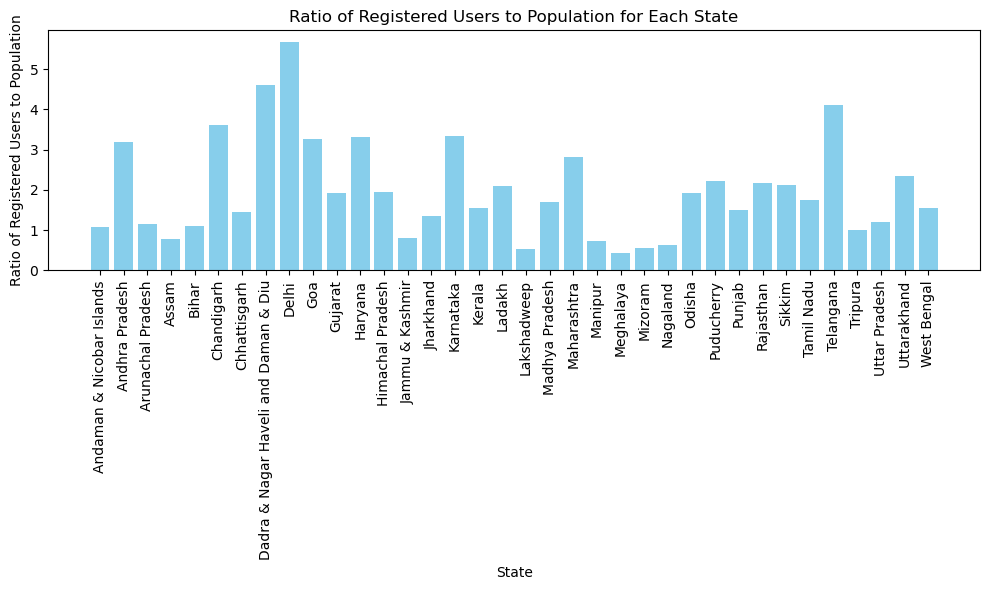

In [47]:
# Create a column chart
plt.figure(figsize=(10, 6))
plt.bar(state_distdemo_merged_data['State'], state_distdemo_merged_data['Ratio'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Ratio of Registered Users to Population')
plt.title('Ratio of Registered Users to Population for Each State')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

### 4.2: Correlate population density with transaction volume

In [9]:
district_tax_data = dis_txn_user_df.groupby('District').sum().reset_index()


district_demo=dis_demo_df.groupby('District').sum().reset_index()

district_distdemo_merged_data = district_tax_data.merge(
    district_demo,
    on = 'District')

print(district_distdemo_merged_data)

                District                                            State_x  \
0               Adilabad  TelanganaTelanganaTelanganaTelanganaTelanganaT...   
1             Agar Malwa  Madhya PradeshMadhya PradeshMadhya PradeshMadh...   
2                   Agra  Uttar PradeshUttar PradeshUttar PradeshUttar P...   
3             Ahmednagar  MaharashtraMaharashtraMaharashtraMaharashtraMa...   
4                 Aizawl  MizoramMizoramMizoramMizoramMizoramMizoramMizo...   
..                   ...                                                ...   
618  Yadadri Bhuvanagiri  TelanganaTelanganaTelanganaTelanganaTelanganaT...   
619               Yadgir  KarnatakaKarnatakaKarnatakaKarnatakaKarnatakaK...   
620                Yanam  PuducherryPuducherryPuducherryPuducherryPuduch...   
621             Yavatmal  MaharashtraMaharashtraMaharashtraMaharashtraMa...   
622            Zunheboto  NagalandNagalandNagalandNagalandNagalandNagala...   

      Year  Quarter                                

0.4193607618561592


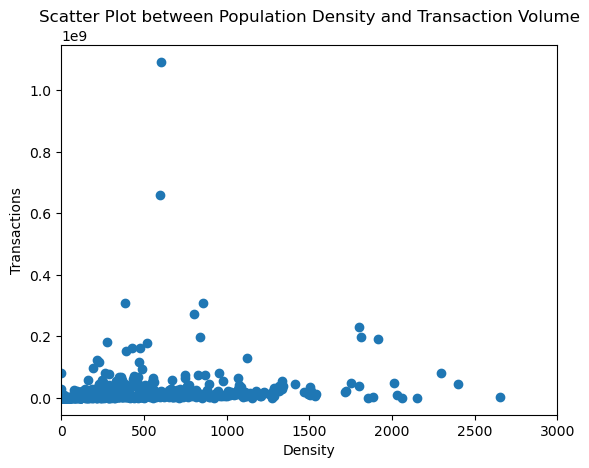

In [10]:
correlation = (district_distdemo_merged_data['Density']).corr(district_distdemo_merged_data['Transactions'])
print(correlation)

plt.scatter(district_distdemo_merged_data['Density'],district_distdemo_merged_data['Transactions'])
plt.xlim(0,3000)
plt.title('Scatter Plot between Population Density and Transaction Volume')
plt.xlabel('Density')
plt.ylabel('Transactions')
plt.show()

### 4.3: Average transaction amount per user

In [77]:
state_tax_data['Average Transaction Amount'] = state_tax_data['Amount (INR)']/state_tax_data['Registered Users']
state_tax_data_modified = state_tax_data.sort_values(by = 'Average Transaction Amount', ascending = False).reset_index()
print(f"Top 5 States according to Average Transaction Amount \n {state_tax_data_modified.head(5)}\n")
print(f"Bottom 5 States according to Average Transaction Amount \n {state_tax_data_modified.tail(5)}")

Top 5 States according to Average Transaction Amount 
    index           State   Year  Quarter  Transactions  Amount (INR)  \
0     31       Telangana  28270       33    2347430243  4.574246e+12   
1     15       Karnataka  28270       33    2981044533  4.361396e+12   
2      1  Andhra Pradesh  28270       33    1781091169  3.187847e+12   
3     28       Rajasthan  28270       33    1382918930  2.625584e+12   
4      8           Delhi  28270       33    1011031124  1.649942e+12   

      ATV (INR)  Registered Users   App Opens  Average Transaction Amount  
0  25801.287201         149224214  4737814072                30653.509622  
1  21243.491492         203098564  6010582453                21474.282206  
2  24473.280668         158007957  5352179585                20175.233763  
3  24607.533894         149770064  3914112235                17530.768707  
4  22257.750300          95374654  1580569662                17299.587909  

Bottom 5 States according to Average Transaction Amount

### 4.4: Device brand usage ratio

In [14]:
state_device_data = st_dev_df.groupby(['State','Brand']).sum().reset_index()
#print(state_device_data)

state_device_merged_data = state_device_data.merge(
    state_tax_data,
    on='State',
    suffixes = ('_Device','_State'))
print(state_device_merged_data)

                         State     Brand  Year_Device  Quarter_Device  \
0    Andaman & Nicobar Islands     Apple        28270              33   
1    Andaman & Nicobar Islands    Huawei        28270              33   
2    Andaman & Nicobar Islands    Lenovo        24228              30   
3    Andaman & Nicobar Islands  Motorola        28270              33   
4    Andaman & Nicobar Islands   OnePlus        28270              33   
..                         ...       ...          ...             ...   
443                West Bengal    Others        28270              33   
444                West Bengal    Realme        28270              33   
445                West Bengal   Samsung        28270              33   
446                West Bengal      Vivo        28270              33   
447                West Bengal    Xiaomi        28270              33   

     Registered Users_Device  Percentage  Year_State  Quarter_State  \
0                       9334    0.360065       28270

In [16]:
state_device_merged_data['Device Ratio'] = (state_device_merged_data['Registered Users_Device'] / state_device_merged_data['Registered Users_State']).round(2)
print(state_device_merged_data[['State','Brand','Registered Users_Device','Registered Users_State','Device Ratio']])

                         State     Brand  Registered Users_Device  \
0    Andaman & Nicobar Islands     Apple                     9334   
1    Andaman & Nicobar Islands    Huawei                    11497   
2    Andaman & Nicobar Islands    Lenovo                     5362   
3    Andaman & Nicobar Islands  Motorola                     9491   
4    Andaman & Nicobar Islands   OnePlus                    15397   
..                         ...       ...                      ...   
443                West Bengal    Others                 17526532   
444                West Bengal    Realme                  9322038   
445                West Bengal   Samsung                 30516315   
446                West Bengal      Vivo                 18755122   
447                West Bengal    Xiaomi                 38265764   

     Registered Users_State  Device Ratio  
0                    408396          0.02  
1                    408396          0.03  
2                    408396          0.

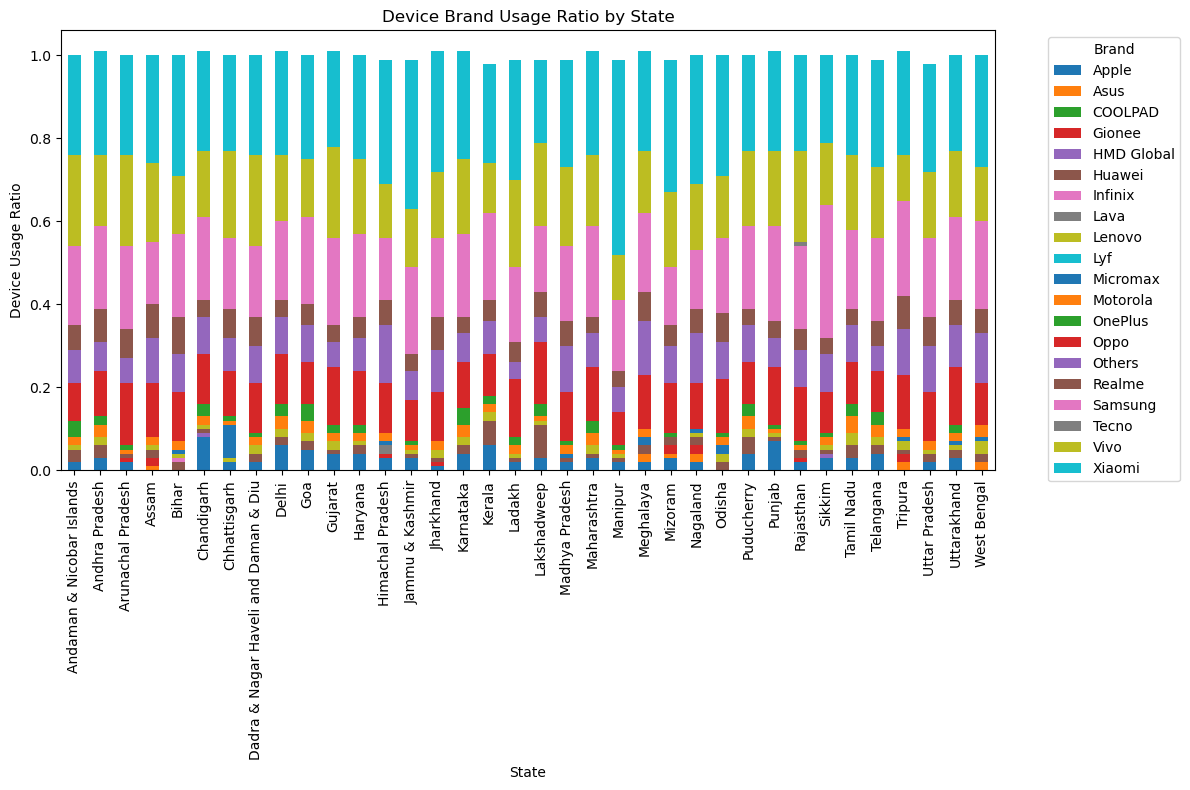

In [19]:
device_ratio_pivot = state_device_merged_data.pivot(index='State', columns='Brand', values='Device Ratio')

# Plot the bar chart
device_ratio_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Device Brand Usage Ratio by State")
plt.xlabel("State")
plt.ylabel("Device Usage Ratio")
plt.legend(title='Brand')
plt.xticks(rotation=90)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5: Data Visualization

### 5.1: Plot the total transactions and amount over time for a selected state

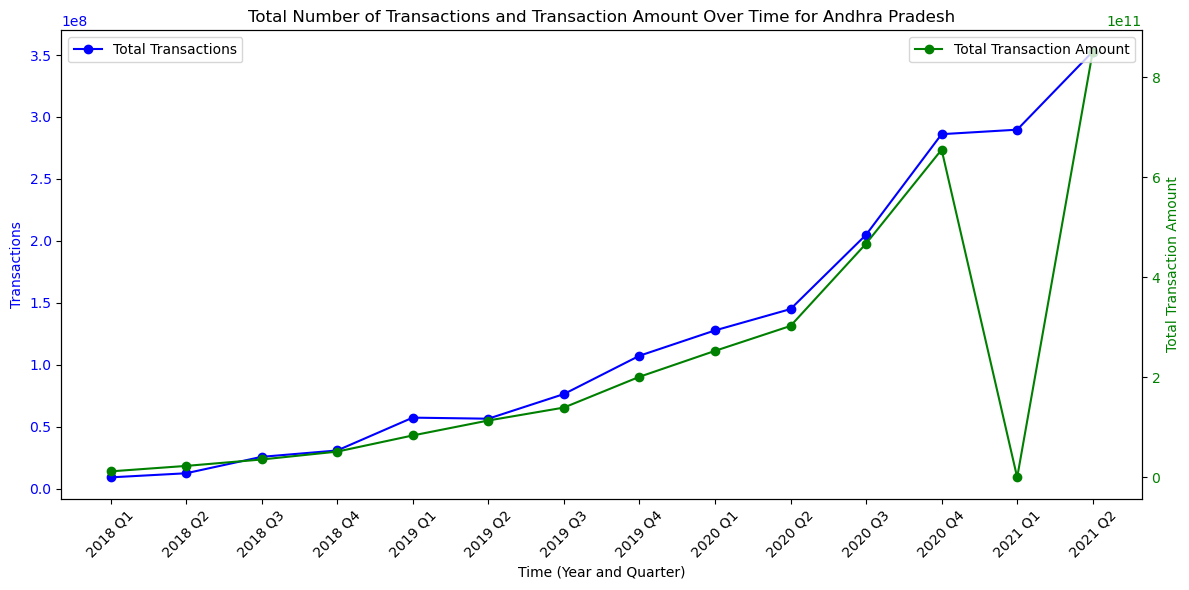

In [30]:
selected_state = 'Andhra Pradesh'

state_data = st_txn_df[st_txn_df['State']==selected_state]

state_data_grouped = state_data.groupby(['Year', 'Quarter']).agg({
    'Transactions': 'sum',
    'Amount (INR)': 'sum'
}).reset_index()

state_data_grouped['Year-Quarter'] = state_data_grouped['Year'].astype(str) + ' Q' + state_data_grouped['Quarter'].astype(str)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Transactions
ax1.plot(state_data_grouped['Year-Quarter'], state_data_grouped['Transactions'], color='blue', marker='o', label='Total Transactions')
ax1.set_xlabel('Time (Year and Quarter)')
ax1.set_ylabel('Transactions', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Create a second y-axis to plot Total Transaction Amount
ax2 = ax1.twinx()
ax2.plot(state_data_grouped['Year-Quarter'], state_data_grouped['Amount (INR)'], color='green', marker='o', label='Total Transaction Amount')
ax2.set_ylabel('Total Transaction Amount', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title
plt.title(f"Total Number of Transactions and Transaction Amount Over Time for {selected_state}")

plt.tight_layout()
plt.show()


###  5.2: Create a pie chart showing the distribution of transaction types for a specific quarter

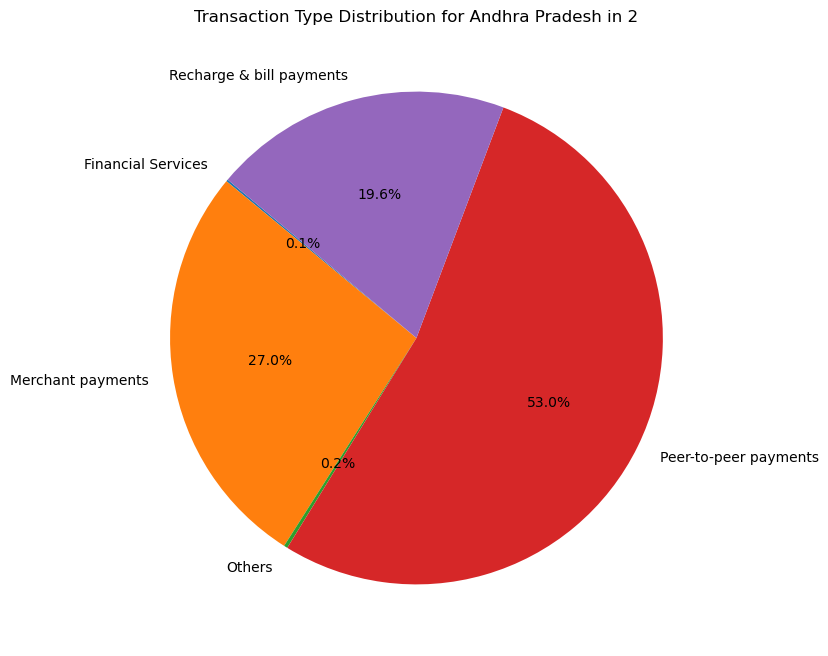

In [6]:
selected_state = 'Andhra Pradesh'  # Replace with the desired state name
selected_quarter = 2  # Replace with the desired quarter (e.g., 'Q1')

state_quarter_data = st_txn_split_df[(st_txn_split_df['State'] == selected_state) &
                                    (st_txn_split_df['Quarter'] == selected_quarter)]

# Group by transaction type and sum up the transaction count (or amount)
transaction_distribution = state_quarter_data.groupby('Transaction Type')['Transactions'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(transaction_distribution, labels=transaction_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Transaction Type Distribution for {selected_state} in {selected_quarter}")
plt.show()

### 5.3: Visualize the population density of districts in a selected state

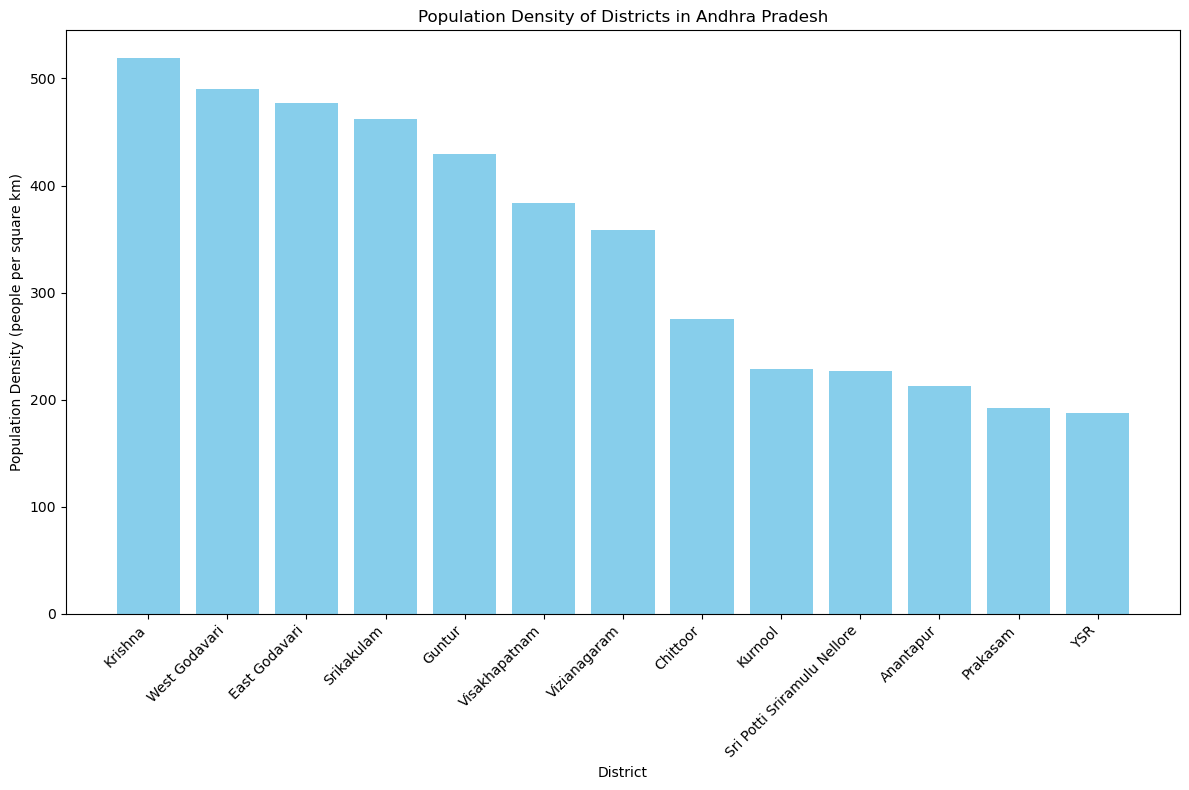

In [7]:
select_state_data = dis_demo_df[dis_demo_df['State'] == selected_state]

# Sort districts by population density for a cleaner plot
select_state_data = select_state_data.sort_values(by='Density', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(select_state_data['District'], select_state_data['Density'], color='skyblue')
plt.title(f"Population Density of Districts in {selected_state}")
plt.xlabel("District")
plt.ylabel("Population Density (people per square km)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6.  Insights and Conclusions [Advanced Section] 

### 6.1: Identify any trends or patterns in the transaction data

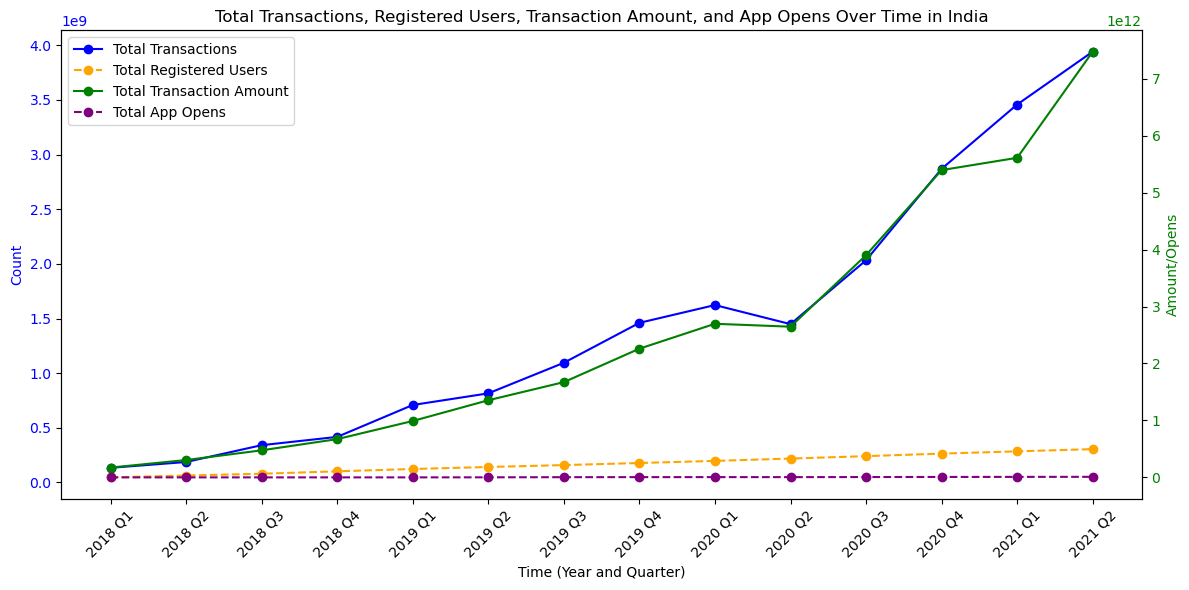

In [46]:
state_transac_data_grouped = st_txn_df.groupby(['Year', 'Quarter']).agg({
    'Transactions': 'sum',
    'Amount (INR)': 'sum',
    'Registered Users': 'sum',
    'App Opens': 'sum'
}).reset_index()

state_transac_data_grouped['Year-Quarter'] = state_transac_data_grouped['Year'].astype(str) + ' Q' + state_transac_data_grouped['Quarter'].astype(str)


fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Transactions on the primary y-axis (left side)
ax1.plot(state_transac_data_grouped['Year-Quarter'], state_transac_data_grouped['Transactions'], color='blue', marker='o', label='Total Transactions')
ax1.plot(state_transac_data_grouped['Year-Quarter'], state_transac_data_grouped['Registered Users'], color='orange', marker='o', linestyle='--', label='Total Registered Users')
ax1.set_xlabel('Time (Year and Quarter)')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Create a second y-axis (right side) for Total Transaction Amount and Total App Opens
ax2 = ax1.twinx()
ax2.plot(state_transac_data_grouped['Year-Quarter'], state_transac_data_grouped['Amount (INR)'], color='green', marker='o', label='Total Transaction Amount')
ax2.plot(state_transac_data_grouped['Year-Quarter'], state_transac_data_grouped['App Opens'], color='purple', marker='o', linestyle='--', label='Total App Opens')
ax2.set_ylabel('Amount/Opens', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set title
plt.title("Total Transactions, Registered Users, Transaction Amount, and App Opens Over Time in India")

plt.tight_layout()
plt.show()

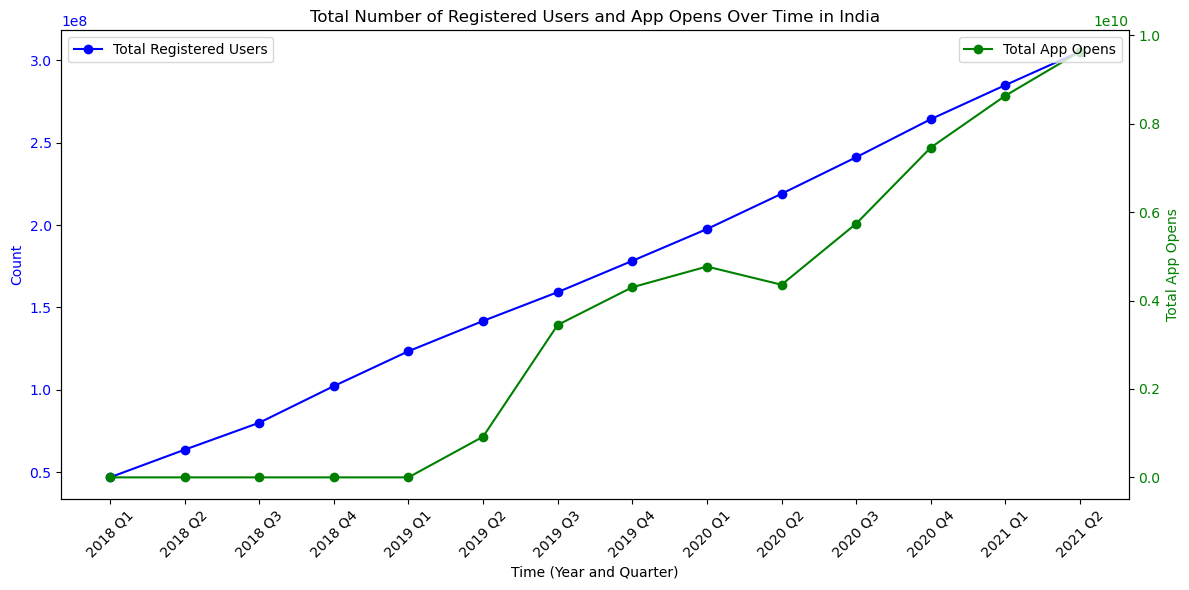

In [47]:
fig, ax3 = plt.subplots(figsize=(12, 6))

# Plot Total Transactions
ax3.plot(state_transac_data_grouped['Year-Quarter'], state_transac_data_grouped['Registered Users'], color='blue', marker='o', label='Total Registered Users')
ax3.set_xlabel('Time (Year and Quarter)')
ax3.set_ylabel('Count', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Create a second y-axis to plot the Total Transaction Amount
ax4 = ax3.twinx()
ax4.plot(state_transac_data_grouped['Year-Quarter'], state_transac_data_grouped['App Opens'], color='green', marker='o', label='Total App Opens')
ax4.set_ylabel('Total App Opens', color='green')
ax4.tick_params(axis='y', labelcolor='green')

# Add legends
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

# Set title
plt.title(f"Total Number of Registered Users and App Opens Over Time in India")

plt.tight_layout()
plt.show()

In [48]:
print(state_transac_data_grouped)

    Year  Quarter  Transactions  Amount (INR)  Registered Users   App Opens  \
0   2018        1     134425599  1.718334e+11          46877653           0   
1   2018        2     187365440  3.043742e+11          63648009           0   
2   2018        3     341299764  4.751015e+11          80010589           0   
3   2018        4     417111607  6.717362e+11         102261621           0   
4   2019        1     708992981  9.900214e+11         123432188           0   
5   2019        2     815380896  1.354214e+12         141807654   920409531   
6   2019        3    1095009675  1.672559e+12         159293319  3448355858   
7   2019        4    1460443663  2.259894e+12         178278417  4301061532   
8   2020        1    1623038046  2.697112e+12         197574459  4768934587   
9   2020        2    1448608890  2.646145e+12         218995596  4357622260   
10  2020        3    2033051183  3.902053e+12         241168896  5739306412   
11  2020        4    2869276622  5.395851e+12       

In [ ]:
### 6.2 

Correlation between Population density and transaction volume is 0.42


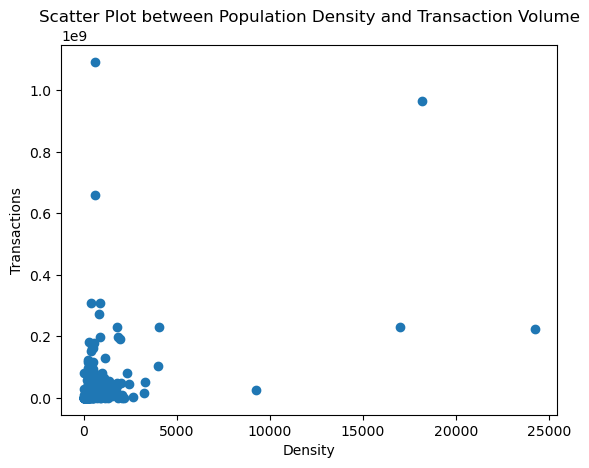

In [29]:
correlation_density_transactvol = ((district_distdemo_merged_data['Density']).corr(district_distdemo_merged_data['Transactions'])).round(2)
print(f"Correlation between Population density and transaction volume is {correlation_density_transactvol}")

plt.scatter(district_distdemo_merged_data['Density'],district_distdemo_merged_data['Transactions'])
plt.title('Scatter Plot between Population Density and Transaction Volume')
plt.xlabel('Density')
plt.ylabel('Transactions')
plt.show()

Correlation between Population density and transaction volume is 0.75


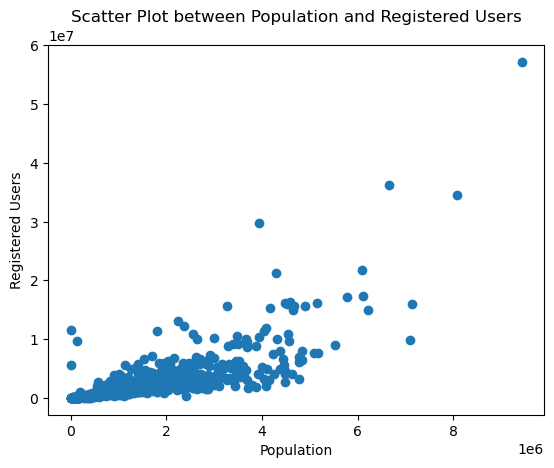

In [25]:
correlation_population_regusers = ((district_distdemo_merged_data['Population']).corr(district_distdemo_merged_data['Registered Users'])).round(2)
print(f"Correlation between Population density and transaction volume is {correlation_population_regusers}")

plt.scatter(district_distdemo_merged_data['Population'],district_distdemo_merged_data['Registered Users'])
plt.title('Scatter Plot between Population and Registered Users')
plt.xlabel('Population')
plt.ylabel('Registered Users')
plt.show()

Correlation between Population density and transaction volume is 0.63


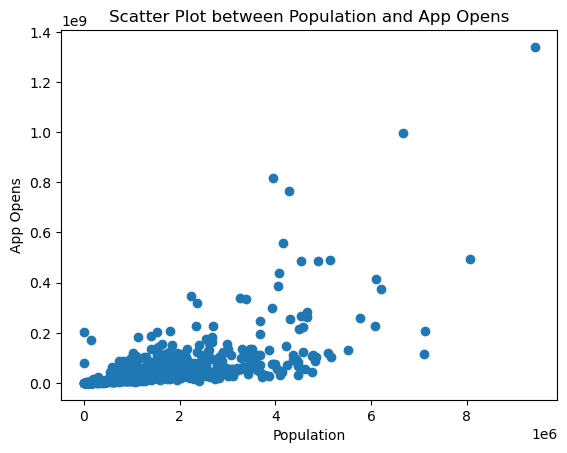

In [26]:
correlation_population_Appopen = ((district_distdemo_merged_data['Population']).corr(district_distdemo_merged_data['App Opens'])).round(2)
print(f"Correlation between Population density and transaction volume is {correlation_population_Appopen}")

plt.scatter(district_distdemo_merged_data['Population'],district_distdemo_merged_data['App Opens'])
plt.title('Scatter Plot between Population and App Opens')
plt.xlabel('Population')
plt.ylabel('App Opens')
plt.show()